## Background Research

The Fashion MNIST clothing classification is a standard dataset used in computer vision and deep learning. It is used as the basis for learning and practicing deep learning.

It is a dataset comprising of 60000 small square 28x28 pixel greyscale images of items of 10 types of clothing, such as shoes, t-shirts, dress and more.


In [1]:
labels = [
    'T-Shirt/Top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle Boots'
]

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
tf.test.is_gpu_available()
plt.style.use('seaborn')

2.6.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2021-11-26 10:23:57.335635: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


False

In [3]:
# Import Dataset
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
print(f"Train: X: {trainX.shape}    y: {trainY.shape}")
print(f"Test: X: {testX.shape}    y: {testY.shape}")

Train: X: (60000, 28, 28)    y: (60000,)
Test: X: (10000, 28, 28)    y: (10000,)


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

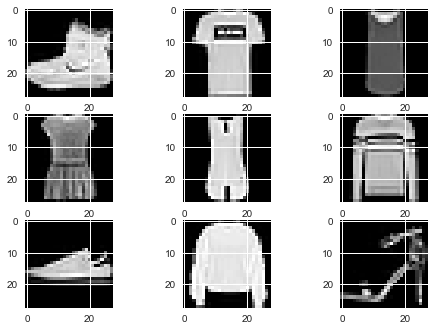

In [4]:
# Plot out first 10 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap("gray"))
plt.show()

In [5]:
# Reshape images
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
# trainY = tf.keras.utils.to_categorical(trainY) # One-hot encoding
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# testY = tf.keras.utils.to_categorical(testY) # One-hot encoding

In [7]:
# train val split
from sklearn.model_selection import train_test_split
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2)


In [8]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
dataGen.fit(trainX)

In [9]:

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255 , input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    metrics=['accuracy'],
)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [11]:
def plotLossAccGraph(result):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(result.history['loss'], label='Training Loss')
    ax1.plot(result.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    # ax1.set_ylim(bottom=0.0, top=0.6)
    ax1.legend()

    ax2.plot(result.history['accuracy'], label='Training Accuracy')
    ax2.plot(result.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    # ax2.set_ylim(bottom=0.85, top=1.0)
    ax2.legend()

    plt.show()


In [12]:

epochs = 50
batch = 512

def train(model, epochs, batch):
    result = model.fit(dataGen.flow(trainX, trainY, batch_size=1024),validation_data=(valX, valY), epochs=epochs, batch_size=batch)
    return result



In [13]:
result = train(model, epochs, batch)
plotLossAccGraph(result)


2021-11-26 10:24:40.860479: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
47/47 [==============================] - 26s 539ms/step - loss: 1.2377 - accuracy: 0.5520 - val_loss: 0.8015 - val_accuracy: 0.7018
Epoch 2/50
47/47 [==============================] - 25s 522ms/step - loss: 0.8034 - accuracy: 0.7046 - val_loss: 0.7123 - val_accuracy: 0.7273
Epoch 3/50
 2/47 [>.............................] - ETA: 44s - loss: 0.7734 - accuracy: 0.7070 

KeyboardInterrupt: 

In [12]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)


In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)      

In [14]:
result1 = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=1024)

Epoch 1/50
59/59 [==============================] - 10s 131ms/step - loss: 0.6013 - accuracy: 0.7964 - val_loss: 2.6302 - val_accuracy: 0.1800
Epoch 2/50
59/59 [==============================] - 6s 95ms/step - loss: 0.2795 - accuracy: 0.8962 - val_loss: 2.8167 - val_accuracy: 0.1864
Epoch 3/50
59/59 [==============================] - 6s 95ms/step - loss: 0.2239 - accuracy: 0.9172 - val_loss: 3.0983 - val_accuracy: 0.2138
Epoch 4/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1851 - accuracy: 0.9320 - val_loss: 3.1412 - val_accuracy: 0.1921
Epoch 5/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1596 - accuracy: 0.9411 - val_loss: 3.1225 - val_accuracy: 0.2350
Epoch 6/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1310 - accuracy: 0.9514 - val_loss: 2.4834 - val_accuracy: 0.2753
Epoch 7/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1123 - accuracy: 0.9585 - val_loss: 1.3515 - val_accuracy: 0.5278
Epoch 8/50


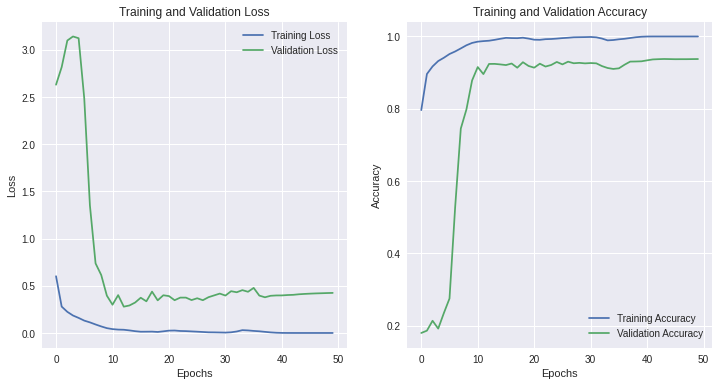

In [15]:
plotLossAccGraph(result1)

In [16]:
model1.save("mnist_model.h5")